## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Logistic Regression , KNN , SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Importing the data

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
### Information about features rows,memory usage and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
### Shape of the dataset having 32 columns and 569 rows
df.shape

(569, 33)

In [ ]:
### Statistical analysis of all columns containing mean , median , etc.
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [ ]:
# drop useless columns
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
df.groupby(by='diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


## Visualizing the data

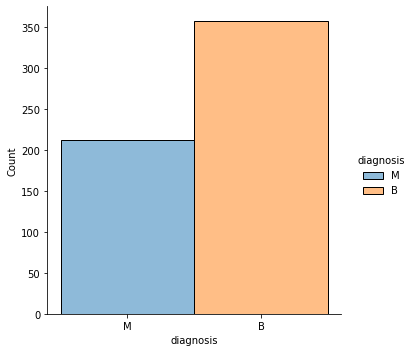

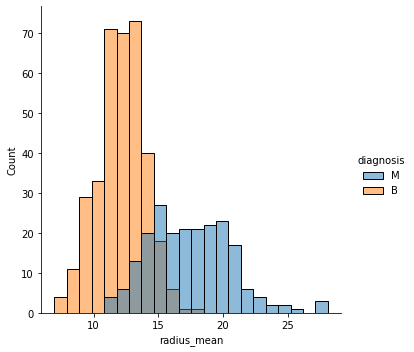

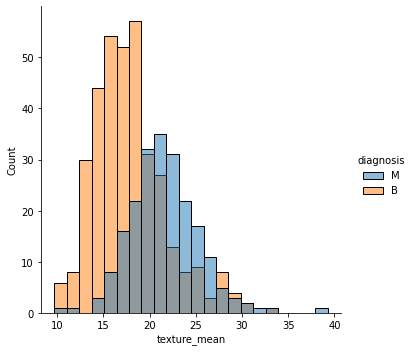

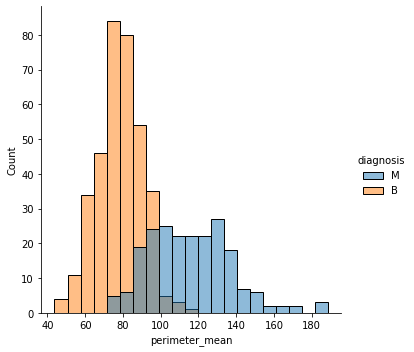

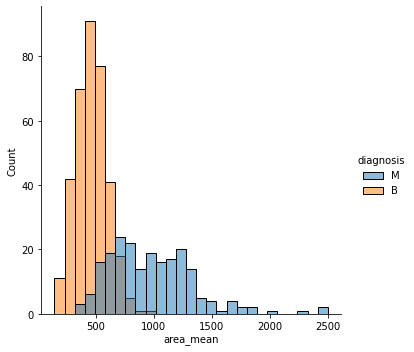

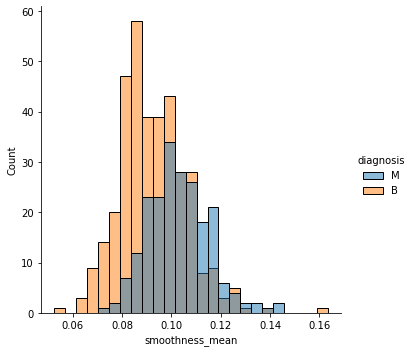

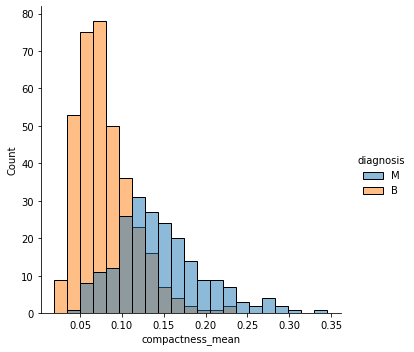

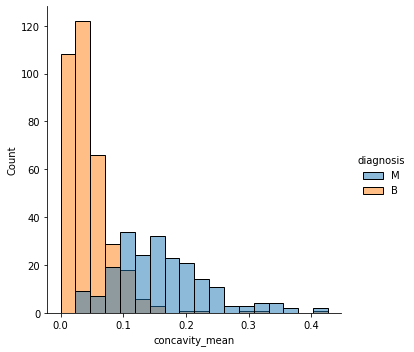

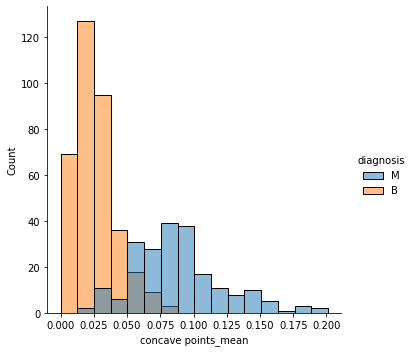

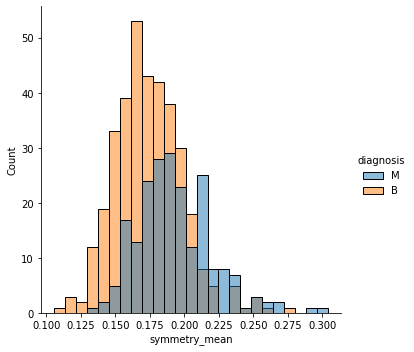

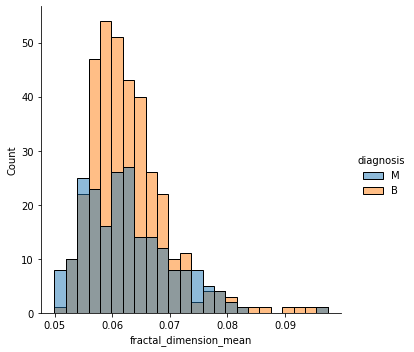

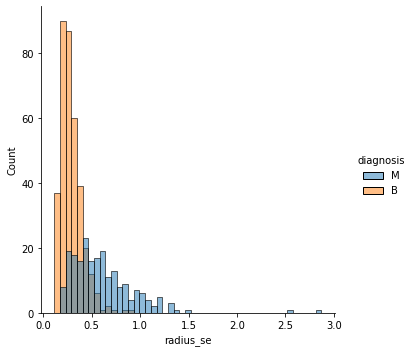

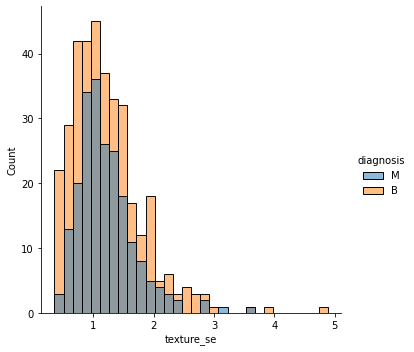

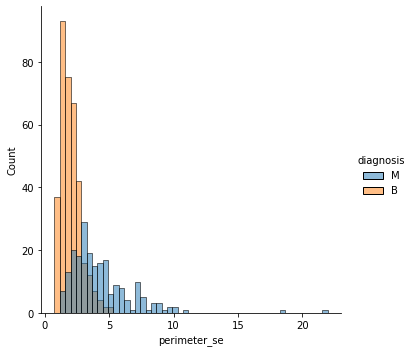

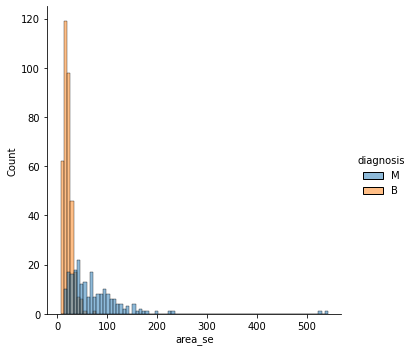

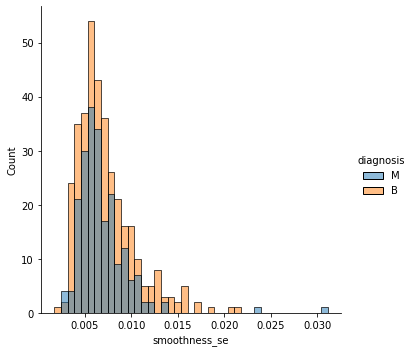

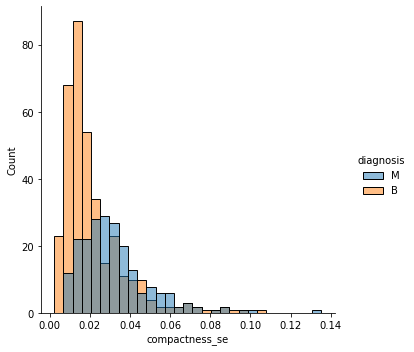

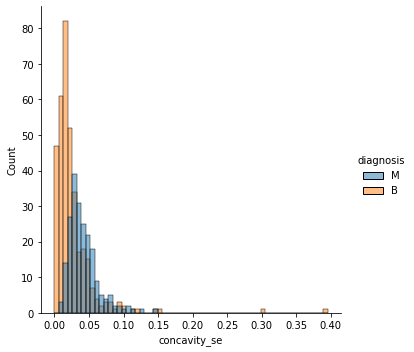

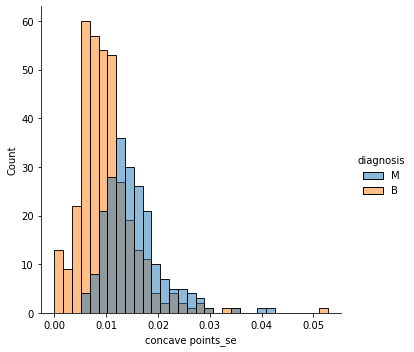

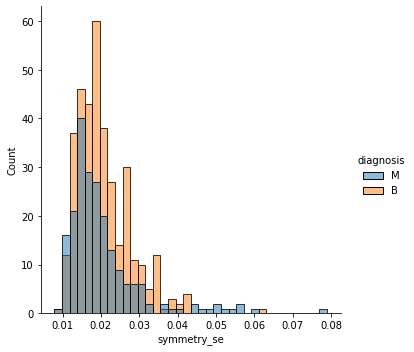

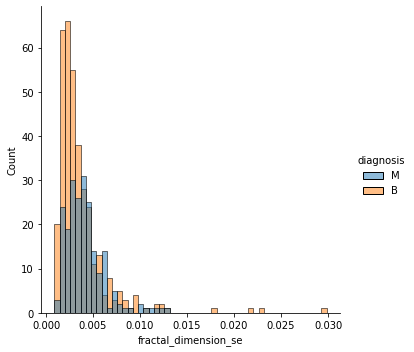

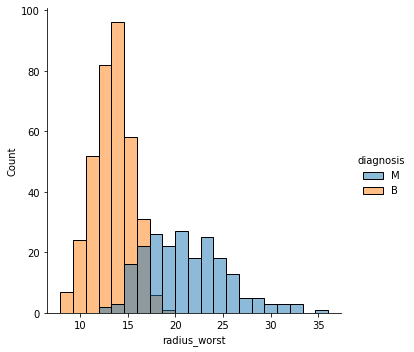

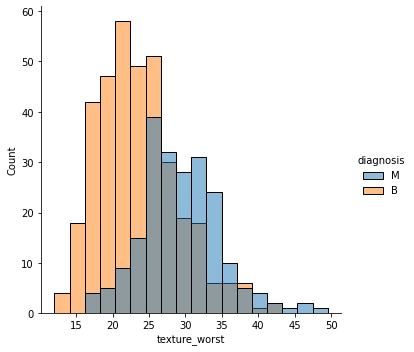

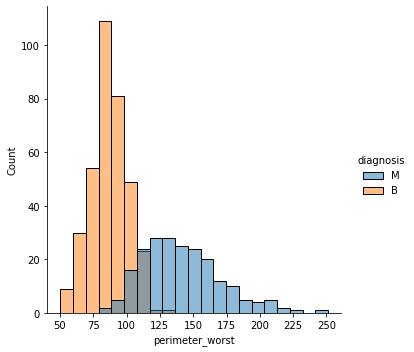

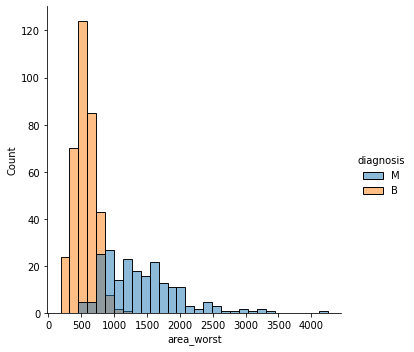

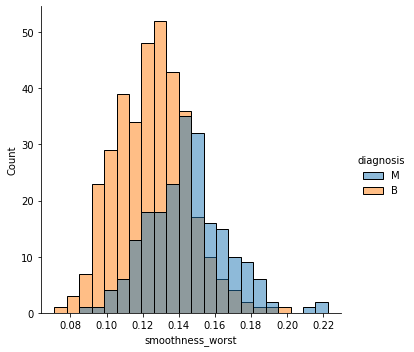

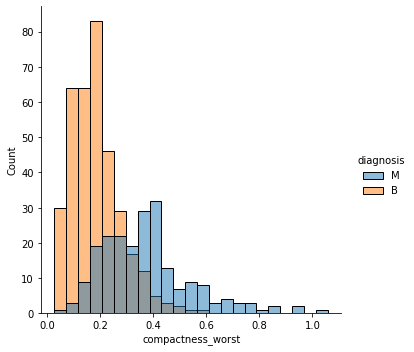

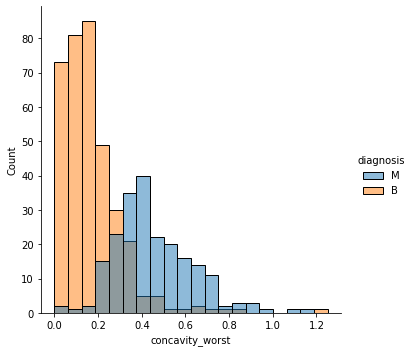

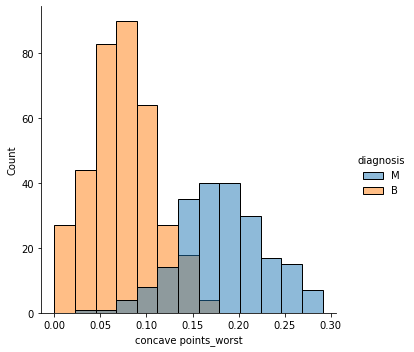

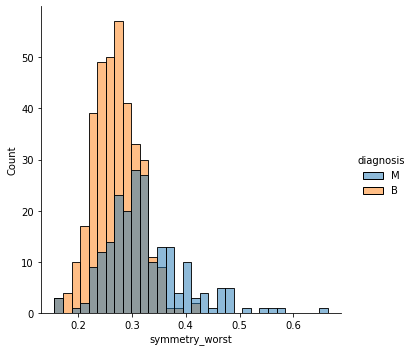

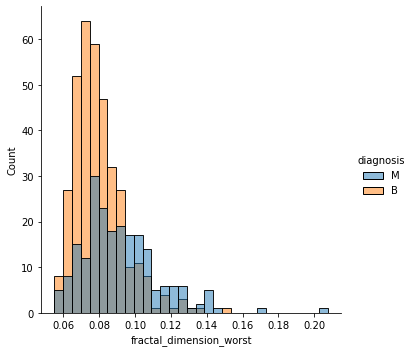

In [ ]:
plt.rcParams['figure.max_open_warning'] = 31

for i in range(len(df.columns)):
  sns.displot(df,x=df.columns[i],hue='diagnosis')

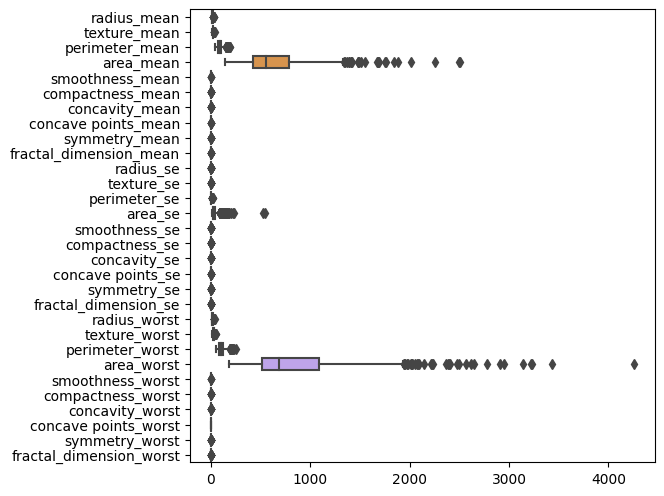

In [ ]:
### Boxplot checking outliers
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

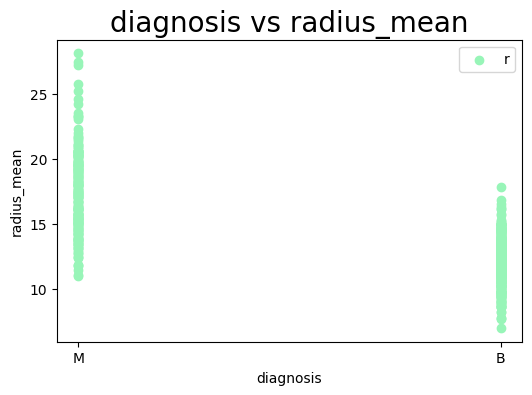

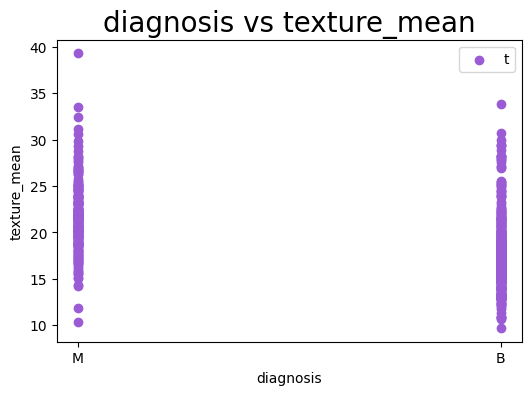

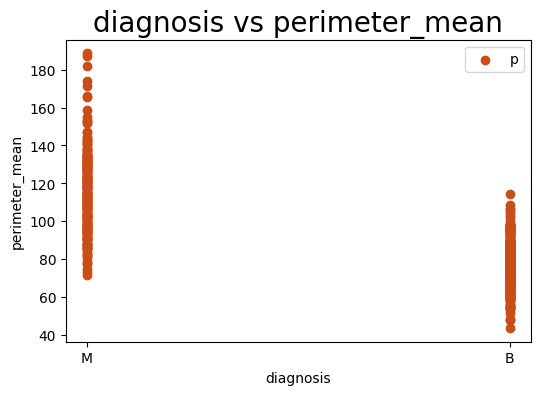

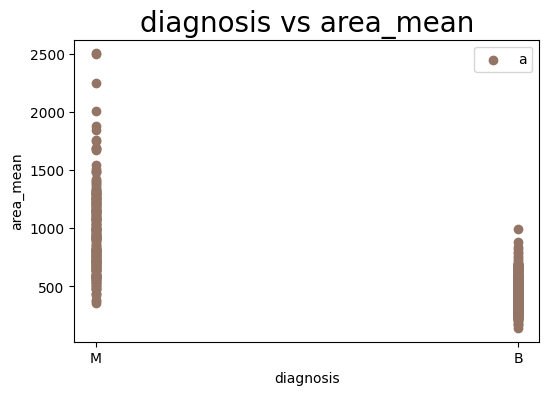

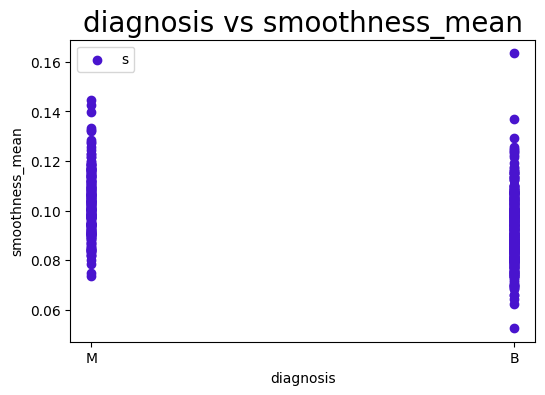

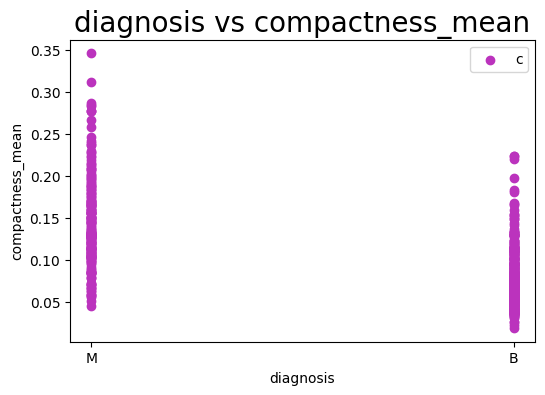

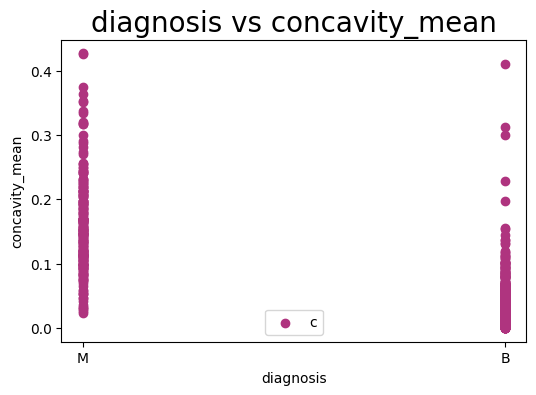

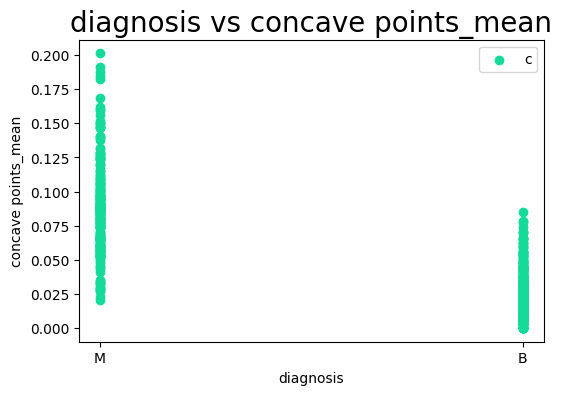

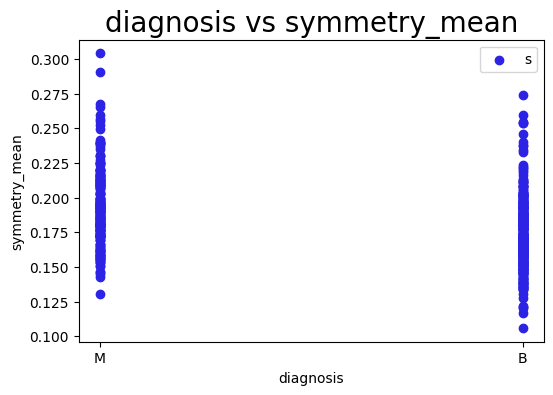

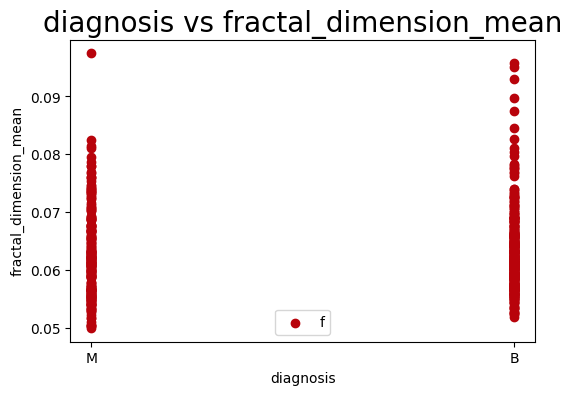

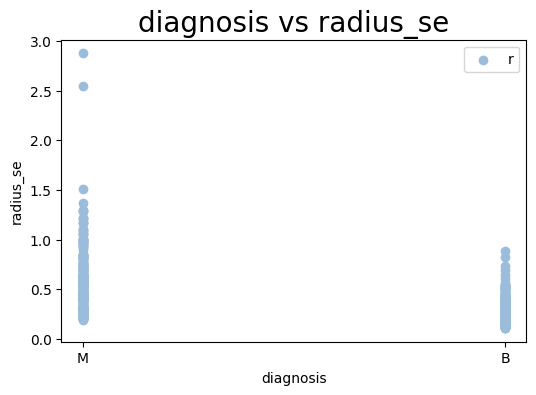

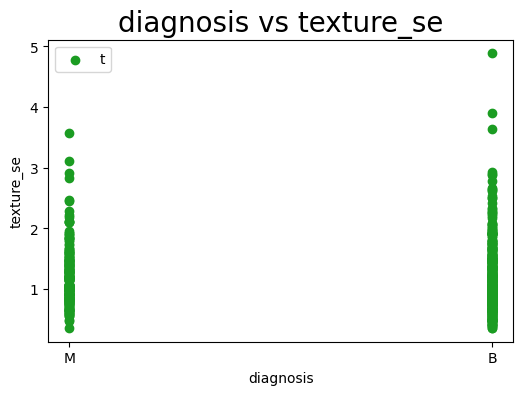

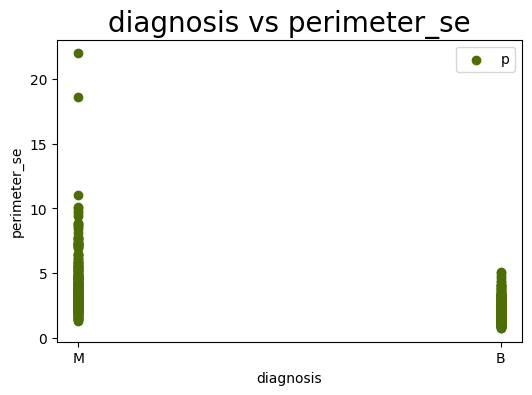

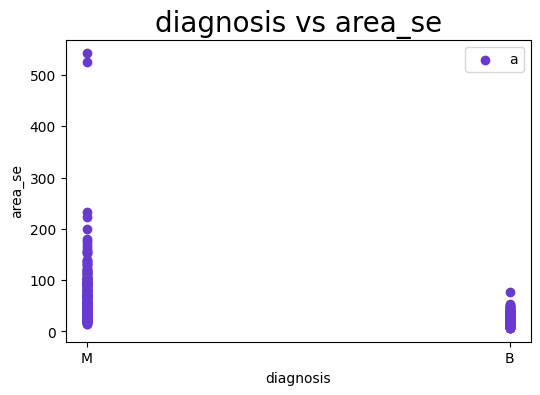

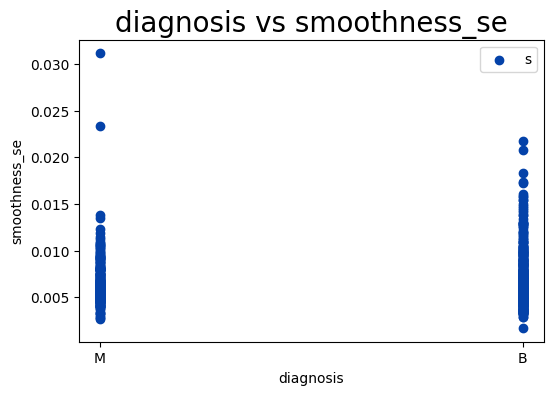

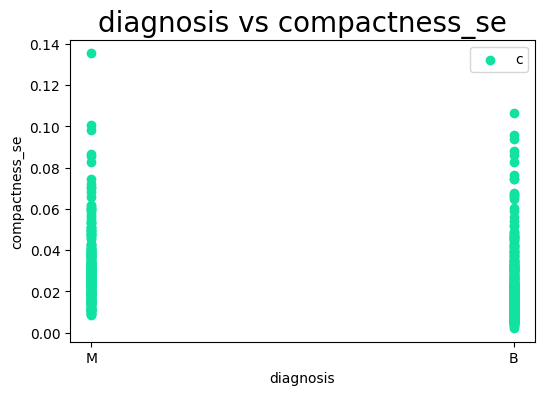

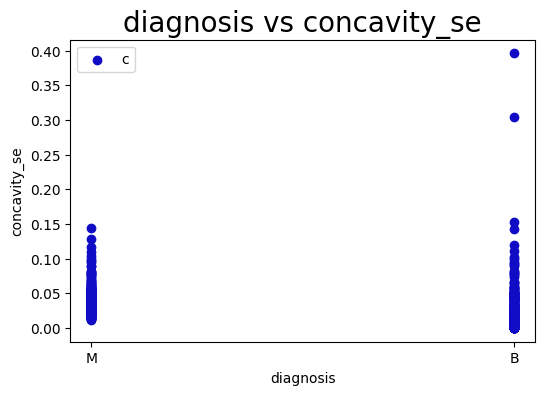

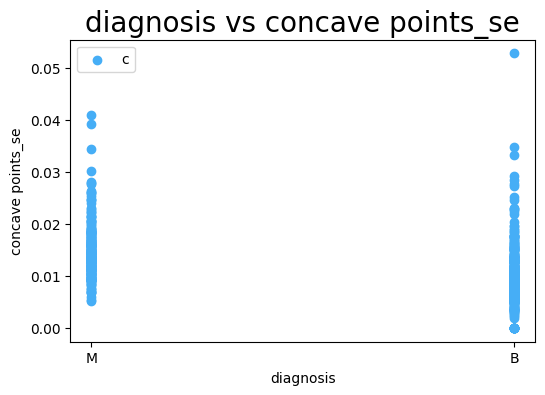

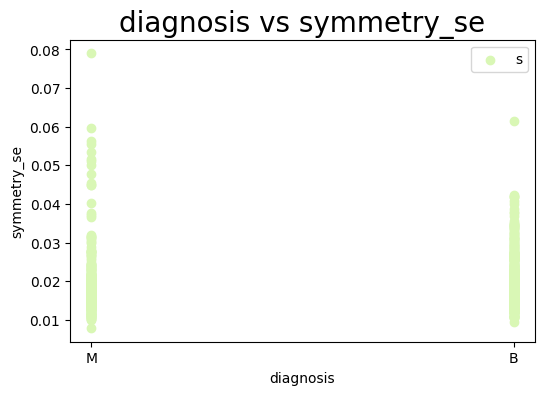

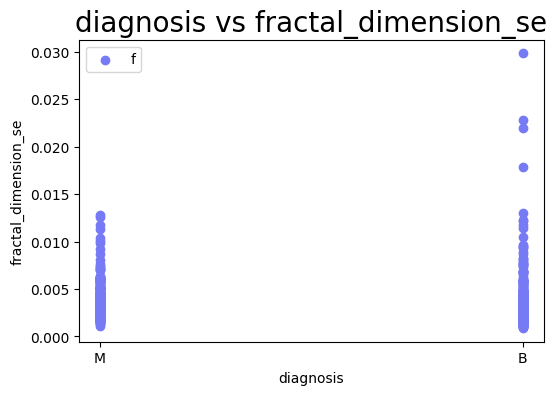

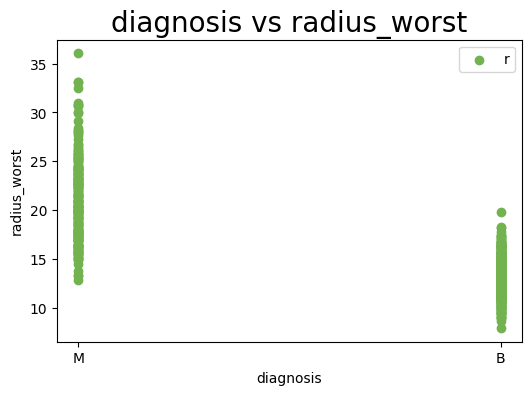

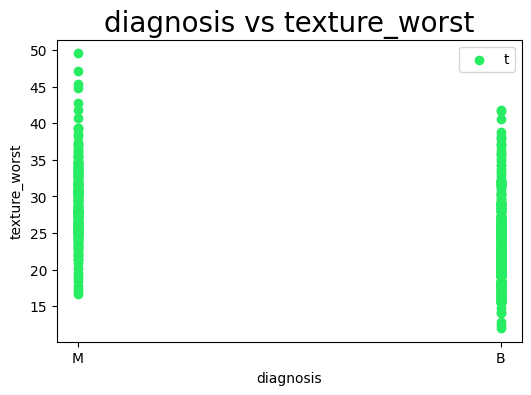

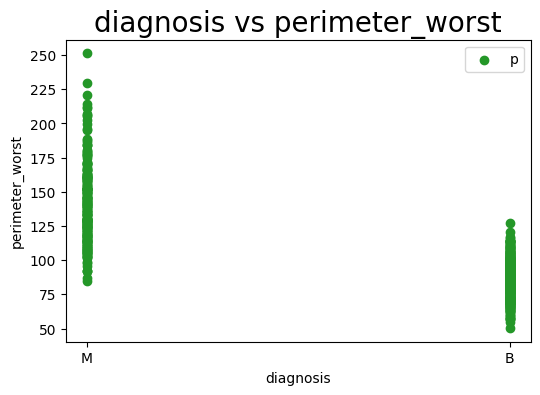

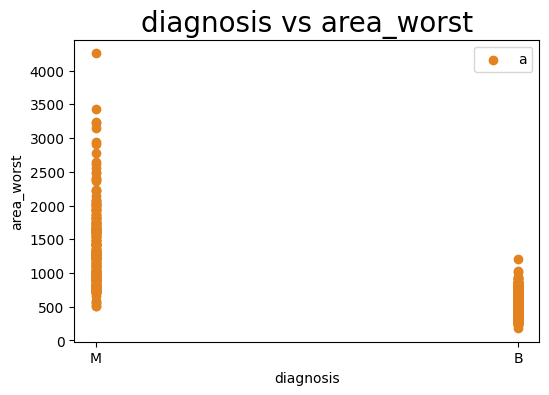

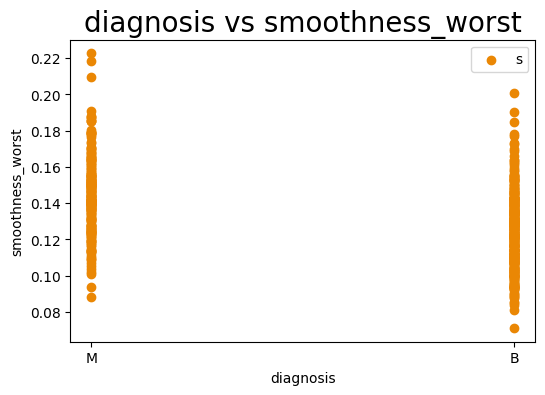

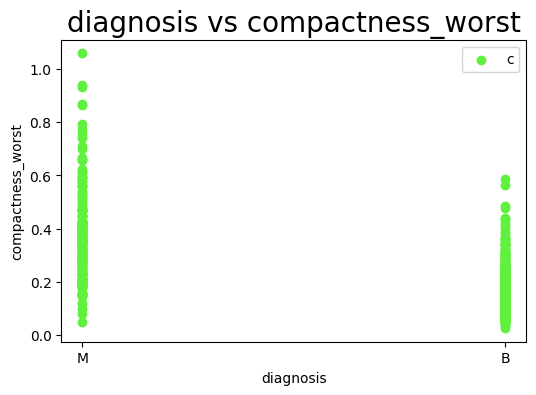

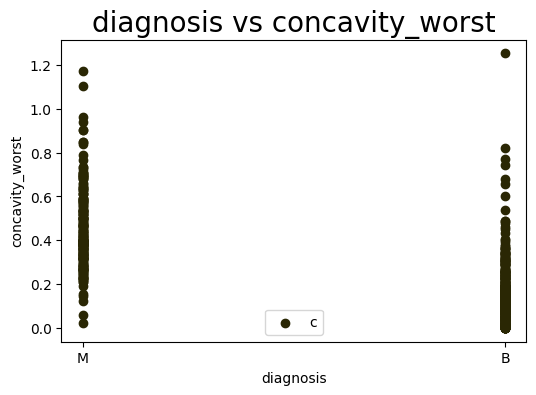

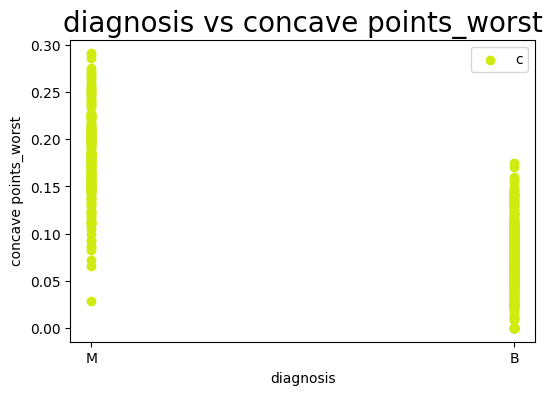

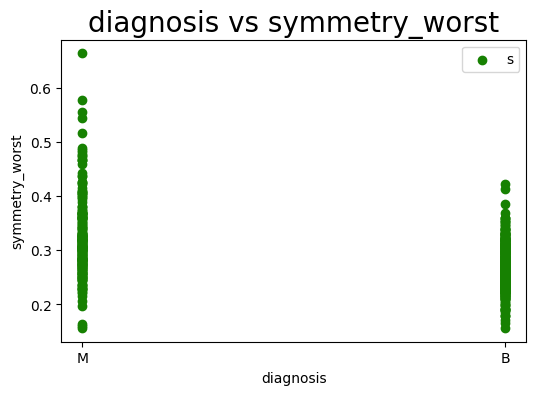

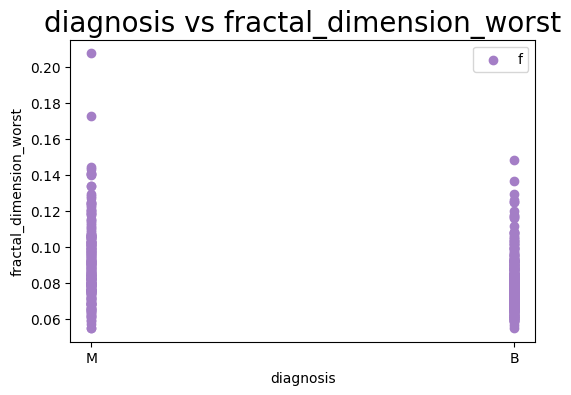

In [ ]:
# ### Bivariate Analysis

# In[18]:


x_col = 'diagnosis'
y_cols = list(df.drop('diagnosis',axis=1).columns)

for col in y_cols:
    figure = plt.figure(dpi=100)
    ax = plt.gca()
    rgb = np.random.rand(3,)
    ax.scatter(df[x_col], df[col],c=[rgb])
    ax.set_xlabel(x_col)
    ax.set_ylabel(col)
    ax.set_title("{} vs {}".format(x_col,col),fontdict={'fontsize':20})

    plt.legend(labels=col)
    plt.show()

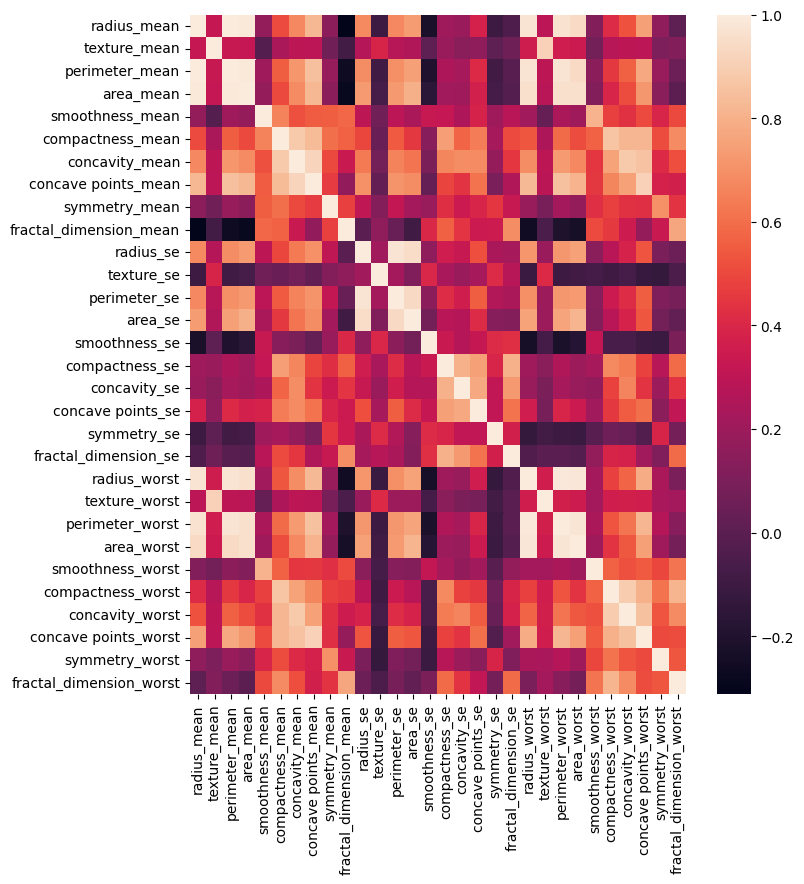

In [ ]:
# ## Multivariate Analysis
# - Correlation Heatmap

# In[19]:


plt.figure(figsize=(8,9),dpi=100)
sns.heatmap(df.corr())

In [ ]:
# ## **Handling Missing Values**

# In[20]:


### Checking missing values for all columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
### Mapping target column to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
### Value counts of target column
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


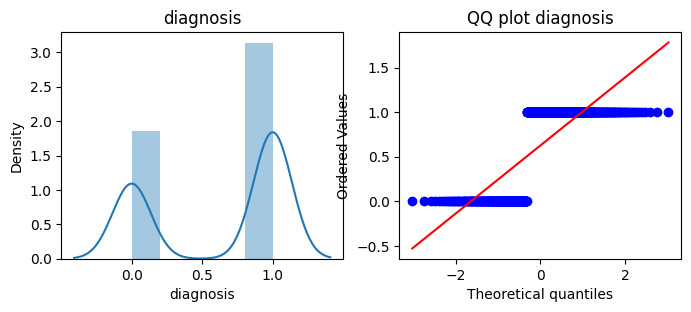

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


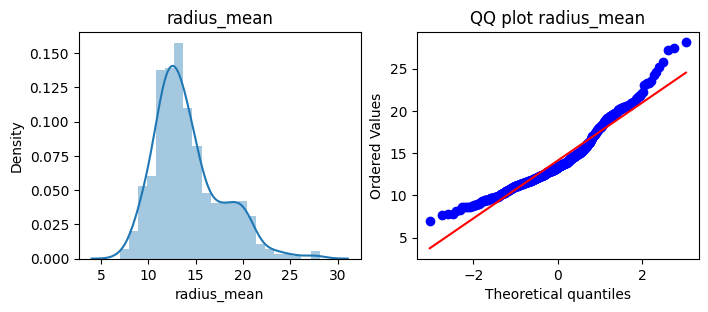

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


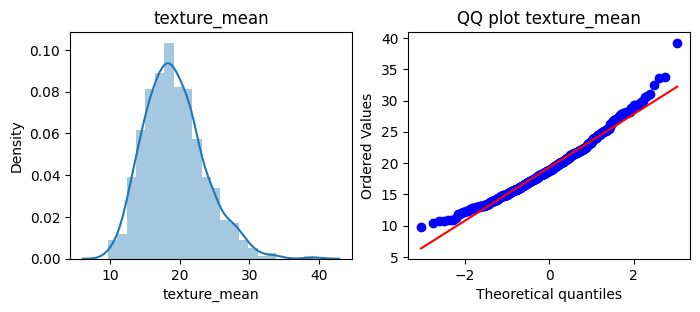

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


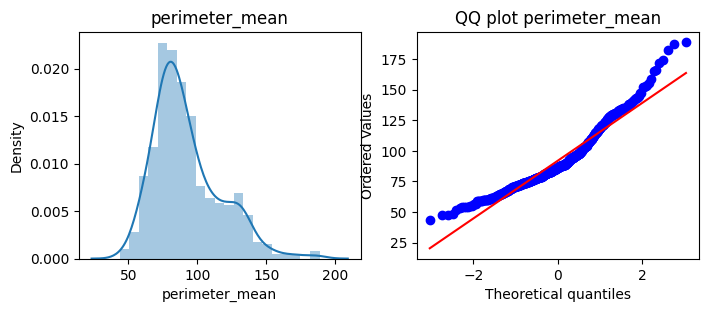

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


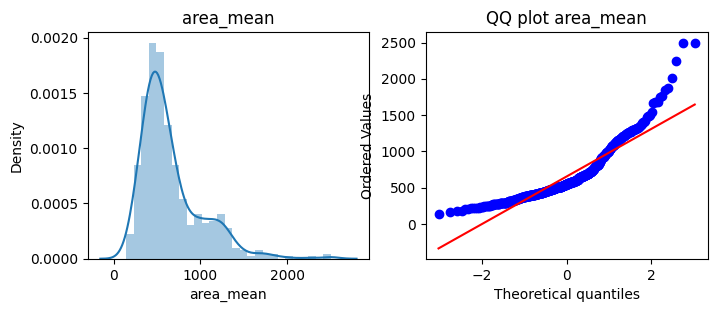

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


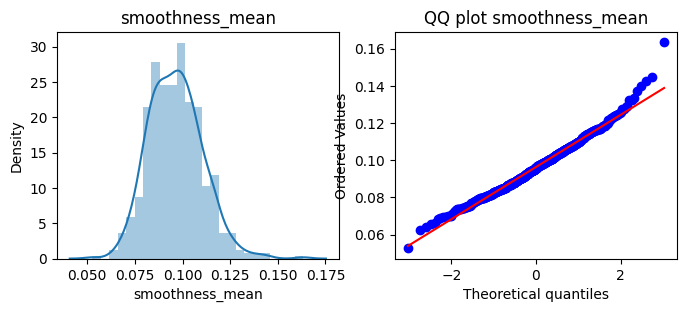

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


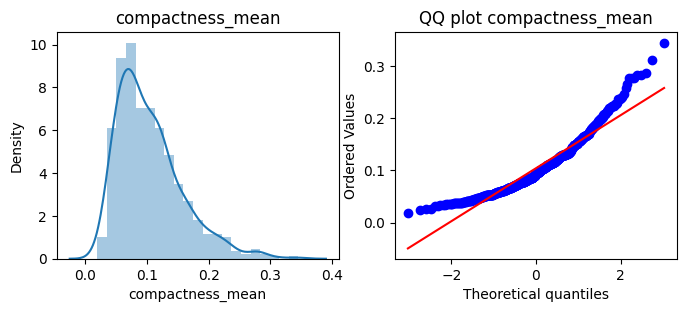

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


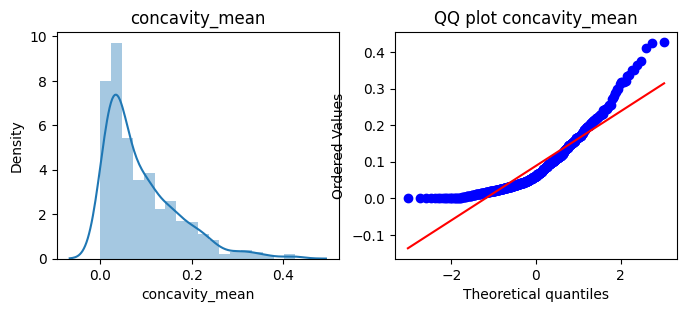

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


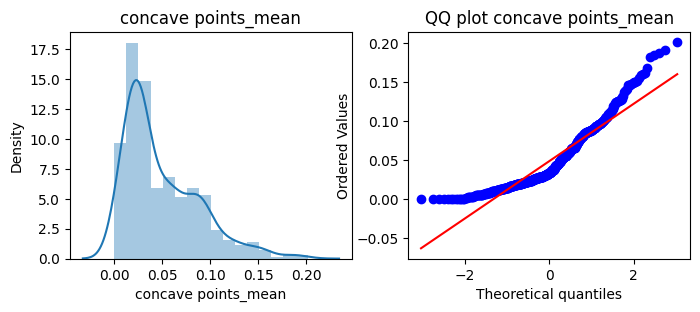

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


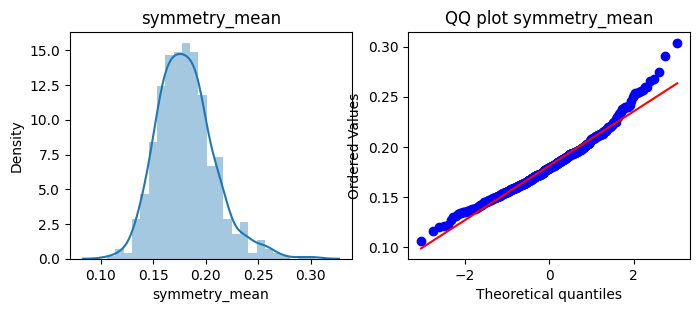

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


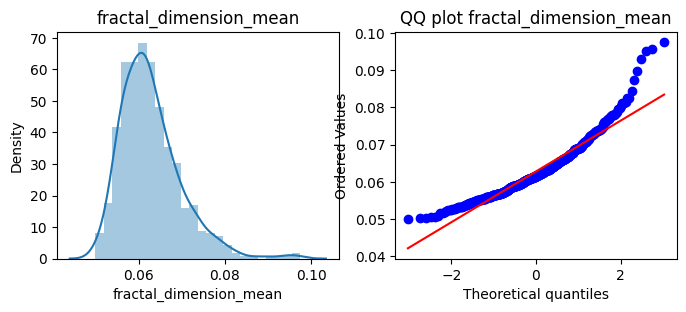

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


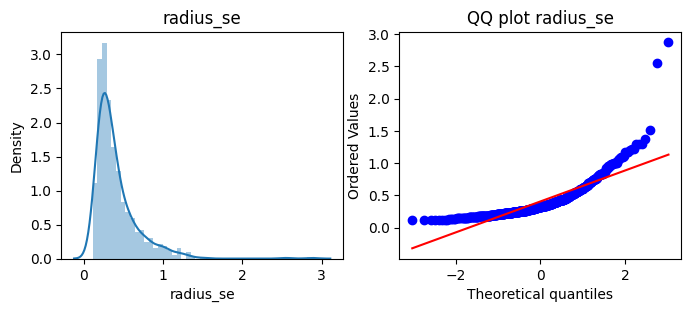

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


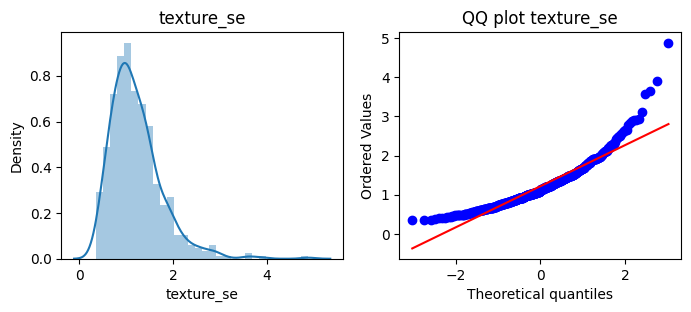

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


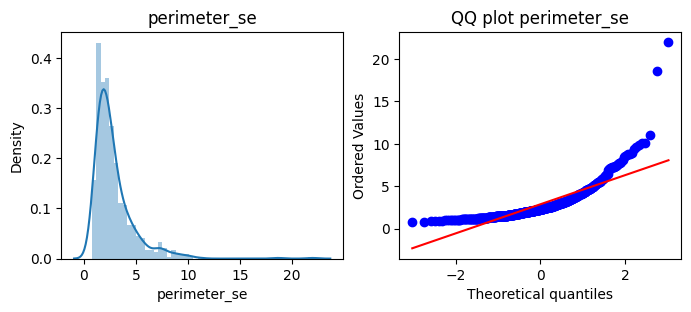

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


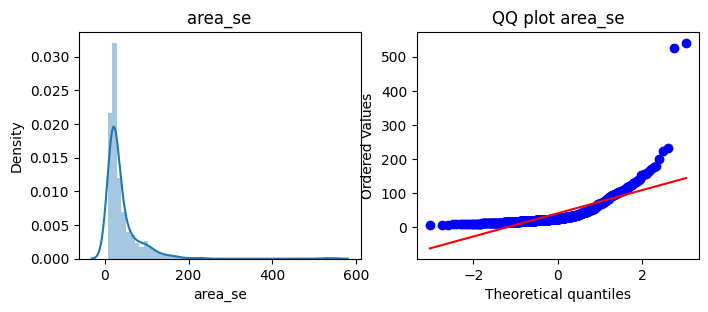

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


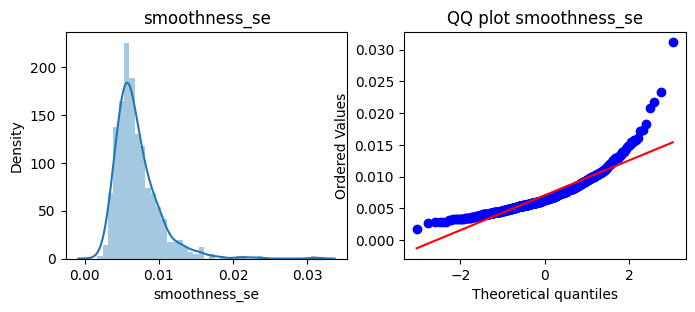

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


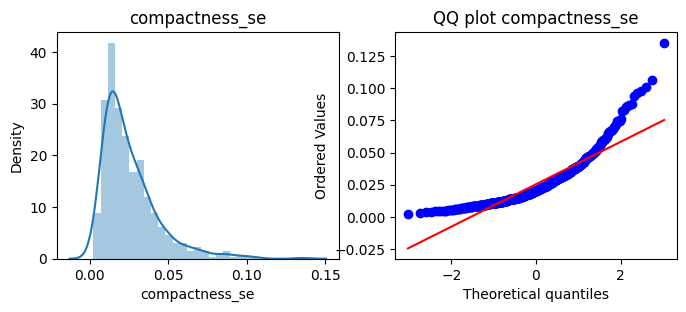

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


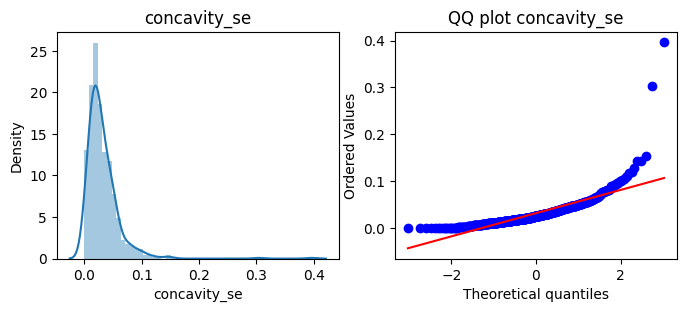

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


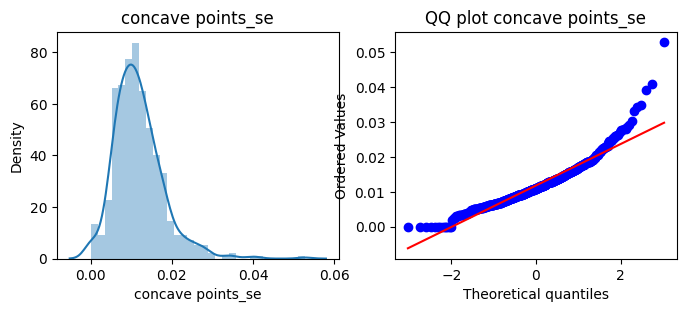

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


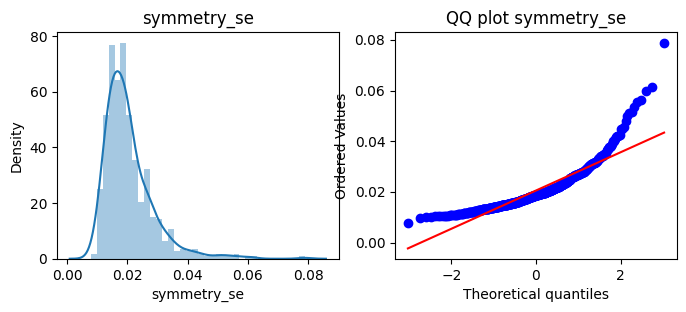

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


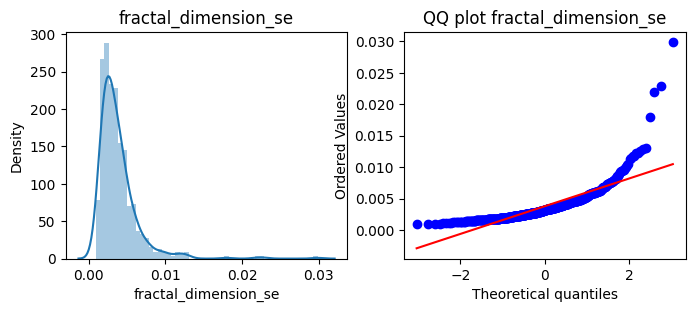

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


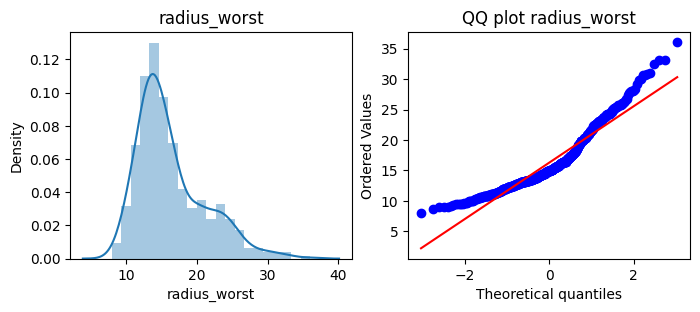

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


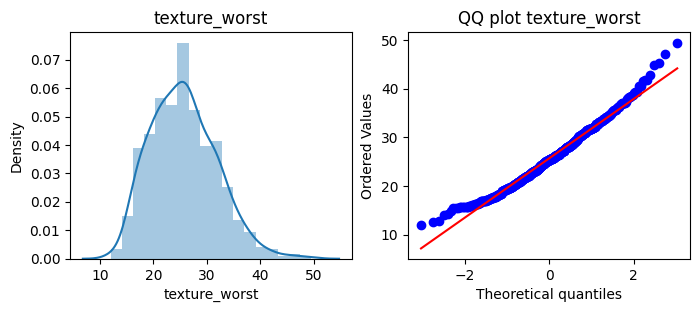

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


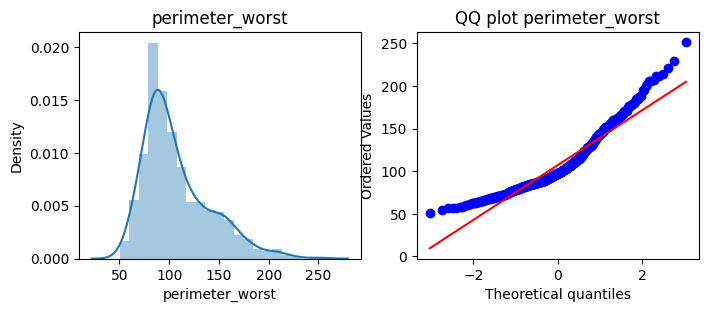

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


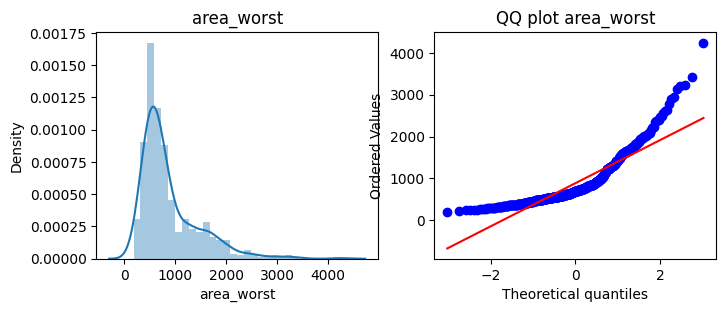

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


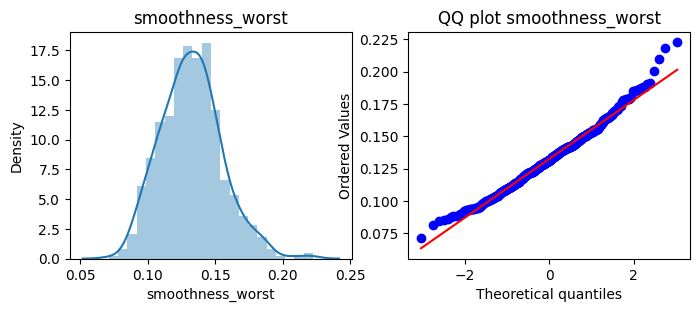

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


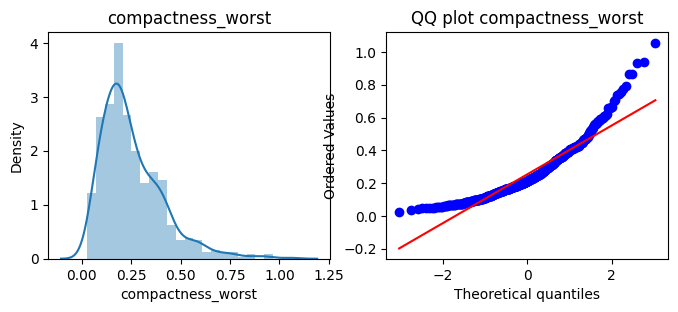

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


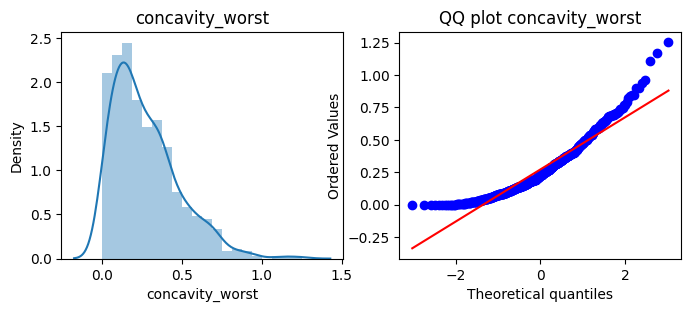

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


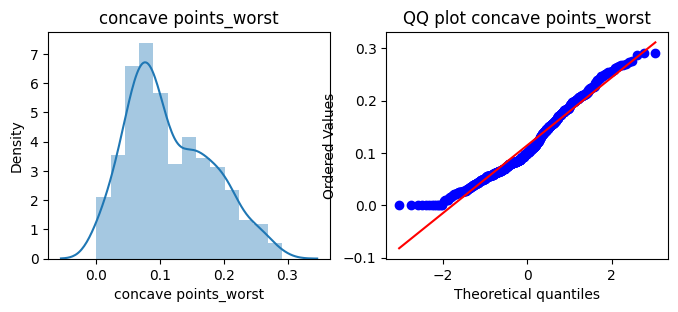

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


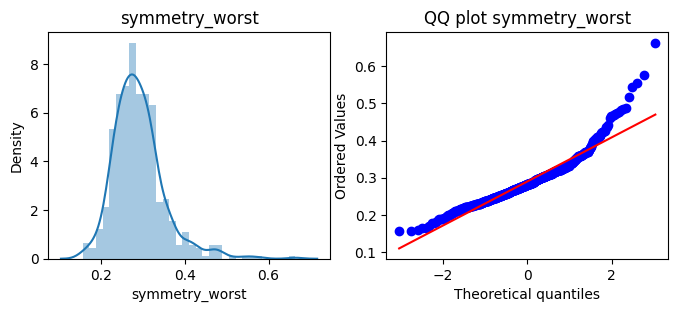

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


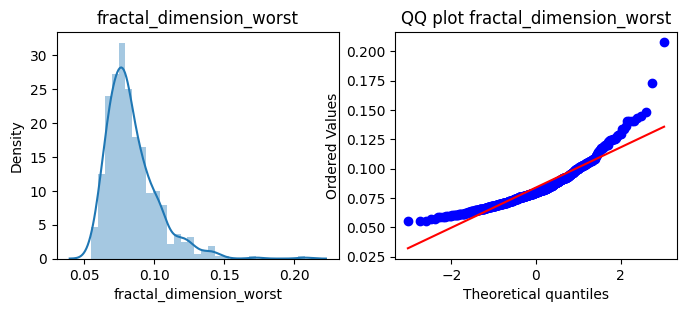

In [ ]:
# ## **Handling Numerical Variables**

# In[24]:


### Plotting distribution graph and QQ-Plot
for i in range(len(df.columns)):
  plt.figure(figsize=(8,3),dpi=100)
  plt.subplot(121)
  sns.distplot(df[df.columns[i]])
  plt.title(df.columns[i])
  plt.subplot(122)
  stats.probplot(df[df.columns[i]], dist="norm", plot=plt)
  plt.title('QQ plot '+df.columns[i])

  plt.show()

In [ ]:
# ### **Detecting Outliers and Removal using Z-score (Capping Method)**

# In[25]:


### Appending upper and lower limit for all columns
upper_limit = []
lower_limit = []
for i in range(len(df.columns)):
  upper_limit.append(df[df.columns[i]].mean() + 3*df[df.columns[i]].std())
  lower_limit.append(df[df.columns[i]].mean() - 3*df[df.columns[i]].std())


In [ ]:
### Replacing all limit values to their relative columns
for i in range(len(df.columns)):
  df[df.columns[i]] = np.where(
    df[df.columns[i]]>upper_limit[i],
    upper_limit[i],
    np.where(
        df[df.columns[i]]<lower_limit[i],
        lower_limit[i],
        df[df.columns[i]]
    )
)

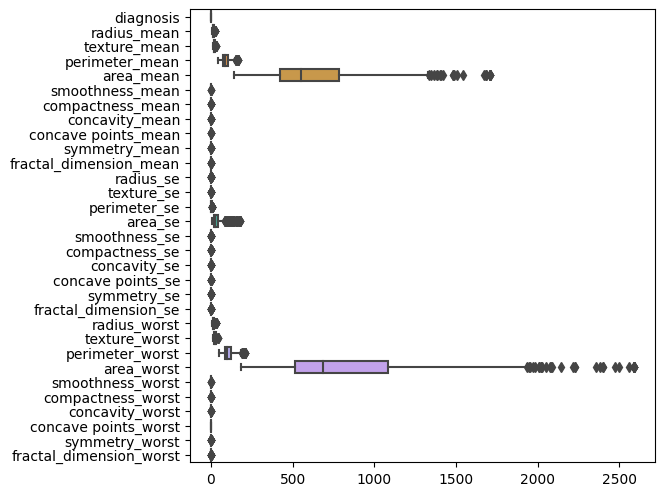

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(data=df,orient='h')

## Splitting data into X,y Variables

In [ ]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

In [ ]:
# ## **Splitting X,Y into training and testing sets**

# In[29]:


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=101)

X_train.shape, X_test.shape

((398, 30), (171, 30))

## Feature Scaling

In [ ]:
# ## **Feature Scaling**

# In[30]:


scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Mean of all columns
scaler.mean_

array([1.40040471e+01, 1.92991483e+01, 9.11065725e+01, 6.41659348e+02,
       9.62817234e-02, 1.03346320e-01, 8.79581706e-02, 4.78391007e-02,
       1.81209595e-01, 6.29780708e-02, 3.85938797e-01, 1.20970953e+00,
       2.72288546e+00, 3.73857022e+01, 6.92511591e-03, 2.47966744e-02,
       3.08044977e-02, 1.14399045e-02, 2.00949179e-02, 3.70950029e-03,
       1.61228982e+01, 2.58695577e+01, 1.06272771e+02, 8.58708646e+02,
       1.32636512e-01, 2.54028887e-01, 2.73882814e-01, 1.14410656e-01,
       2.90183783e-01, 8.45858476e-02])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0
mean,14.0,19.3,91.1,641.7,0.1,0.1,0.1,0.0,0.2,0.1,...,16.1,25.9,106.3,858.7,0.1,0.3,0.3,0.1,0.3,0.1
std,3.5,4.3,24.2,338.2,0.0,0.1,0.1,0.0,0.0,0.0,...,4.9,6.2,33.6,539.2,0.0,0.2,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.5,16.1,74.0,405.2,0.1,0.1,0.0,0.0,0.2,0.1,...,12.8,21.2,83.1,495.4,0.1,0.1,0.1,0.1,0.3,0.1
50%,13.2,18.9,85.8,538.8,0.1,0.1,0.1,0.0,0.2,0.1,...,14.8,25.4,97.2,675.0,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.7,21.9,103.6,761.6,0.1,0.1,0.1,0.1,0.2,0.1,...,18.5,30.3,125.0,1041.8,0.1,0.3,0.4,0.2,0.3,0.1
max,24.7,32.2,164.9,1710.6,0.1,0.3,0.3,0.2,0.3,0.1,...,30.8,44.1,208.1,2588.7,0.2,0.7,0.9,0.3,0.5,0.1


## Model Building

### Logistic Regression CV

In [ ]:
# ## **Model Building**

# ### LogisticRegressionCV

# In[54]:


log_model = LogisticRegressionCV(max_iter=150)
log_model.fit(X_train_scaled,y_train)

LogisticRegressionCV(max_iter=150)

## Evaluation of Model

In [ ]:
y_pred = log_model.predict(X_test_scaled)

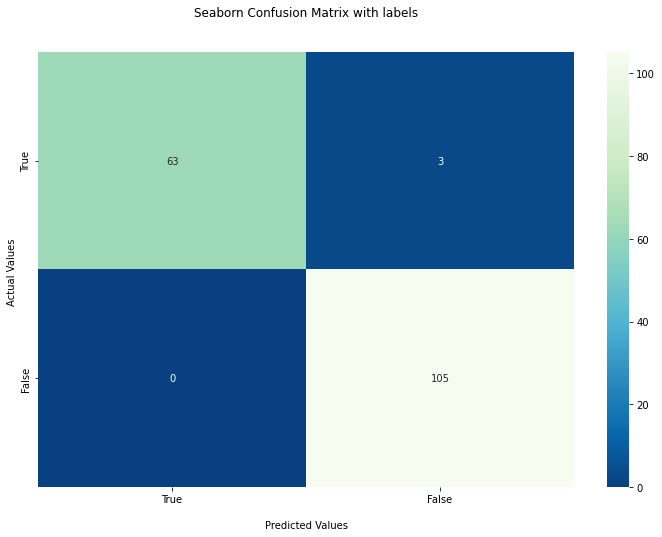

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='GnBu_r', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()
]

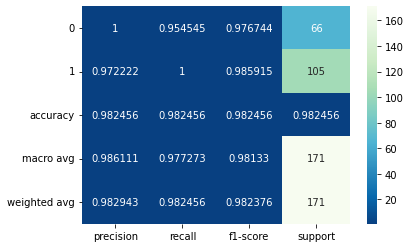

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='GnBu_r', fmt='g')

### Support Vector Machines

In [ ]:
# ## Support Vector Machines

# In[24]:


# an initial SVM model with linear kernel   
svm_linear = SVC(kernel='linear')

# fit
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

### Evaluation of SVM Model

In [ ]:
y_pred = svm_linear.predict(X_test_scaled)

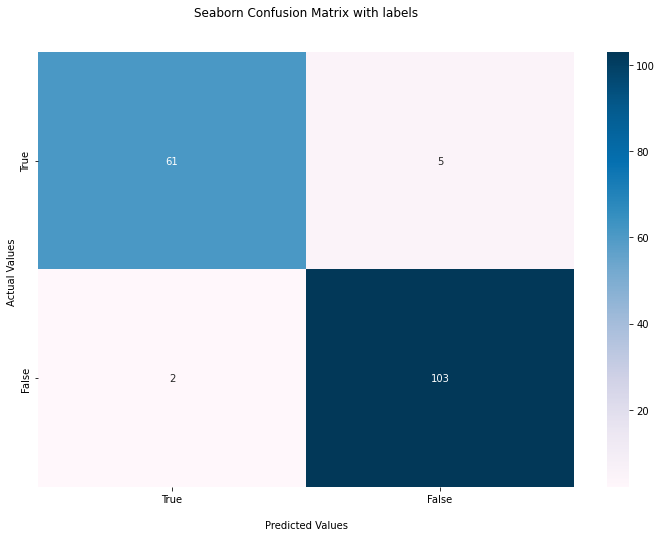

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

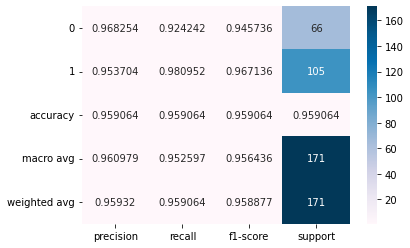

In [ ]:
# - Classification Report of SVM Model

# In[27]:


clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuBu', fmt='g')

In [ ]:
# Hyper-Parameter Tuning with SVM

# In[24]:


parameters = {'C':np.arange(0.001,50,0.5), 
             'gamma': [1e-5,1e-4,1e-3,1e-2,1e-1,1e0],
              'kernel': ['linear','rbf']}

# instantiate a model 
svc_grid_search = SVC()

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True,n_jobs=-1)

# fit
clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.0000e-03, 5.0100e-01, 1.0010e+00, 1.5010e+00, 2.0010e+00,
       2.5010e+00, 3.0010e+00, 3.5010e+00, 4.0010e+00, 4.5010e+00,
       5.0010e+00, 5.5010e+00, 6.0010e+00, 6.5010e+00, 7.0010e+00,
       7.5010e+00, 8.0010e+00, 8.5010e+00, 9.0010e+00, 9.5010e+00,
       1.0001e+01, 1.0501e+01, 1.1001e+01, 1.1501e+01, 1.2001e+01,
       1.2501e+01, 1....
       3.7501e+01, 3.8001e+01, 3.8501e+01, 3.9001e+01, 3.9501e+01,
       4.0001e+01, 4.0501e+01, 4.1001e+01, 4.1501e+01, 4.2001e+01,
       4.2501e+01, 4.3001e+01, 4.3501e+01, 4.4001e+01, 4.4501e+01,
       4.5001e+01, 4.5501e+01, 4.6001e+01, 4.6501e+01, 4.7001e+01,
       4.7501e+01, 4.8001e+01, 4.8501e+01, 4.9001e+01, 4.9501e+01]),
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head(3)


# In[26]:




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008335,0.000629,0.003646,0.000175,0.001,0.00001,linear,"{'C': 0.001, 'gamma': 1e-05, 'kernel': 'linear'}",0.9000,0.9375,...,0.944778,0.025651,979,0.959119,0.949686,0.940252,0.943574,0.949843,0.948495,0.006454
1,0.011045,0.000430,0.005480,0.000992,0.001,0.00001,rbf,"{'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}",0.6375,0.6375,...,0.633165,0.004569,1084,0.632075,0.632075,0.635220,0.633229,0.633229,0.633166,0.001149
2,0.007646,0.000291,0.003455,0.000105,0.001,0.0001,linear,"{'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}",0.9000,0.9375,...,0.944778,0.025651,979,0.959119,0.949686,0.940252,0.943574,0.949843,0.948495,0.006454


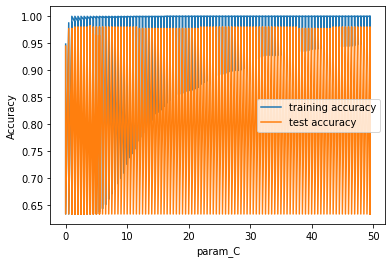

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_C"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_C"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

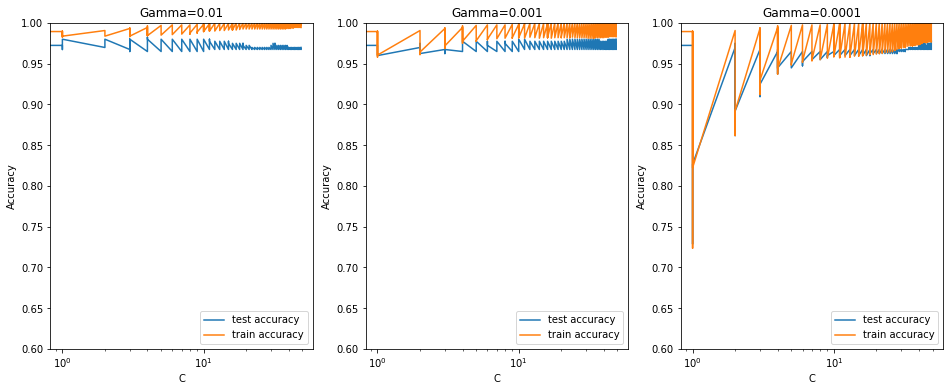

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()


In [ ]:
clf.best_params_,clf.best_score_

({'C': 4.001, 'gamma': 0.01, 'kernel': 'rbf'}, 0.9824367088607595)

In [ ]:
best_SVM = SVC(C=4.001,gamma=0.01,kernel='rbf')
best_SVM.fit(X_train_scaled,y_train)

SVC(C=4.001, gamma=0.01)

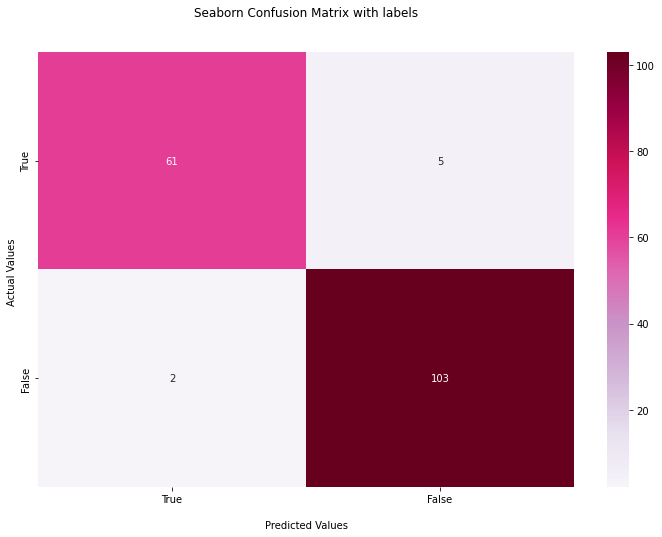

In [ ]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

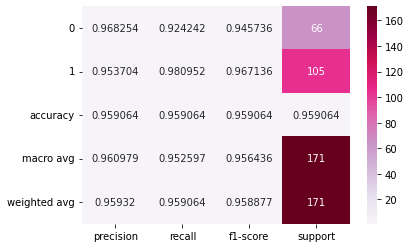

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuRd', fmt='g')

### **Deep Neural Network**

### Model Building

In [ ]:
# Initialising the ANN
ANN_model = Sequential()
ANN_model.add(Dense(128, activation='relu',input_dim=X_train_scaled.shape[1]))
ANN_model.add(Dense(64, activation='relu'))
ANN_model.add(Dense(32, activation='relu'))
ANN_model.add(Dense(1, activation='sigmoid'))

ANN_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               3968      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the ANN
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
history = ANN_model.fit(X_train, y_train,epochs=30,validation_data=(X_test,y_test))
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error.

Epoch 1/30
13/13 [==============================] - 1s 20ms/step - loss: 12.0779 - accuracy: 0.4698 - val_loss: 3.2172 - val_accuracy: 0.6140
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 1.9378 - accuracy: 0.5578 - val_loss: 1.0611 - val_accuracy: 0.5322
Epoch 3/30
13/13 [==============================] - 0s 6ms/step - loss: 0.5514 - accuracy: 0.7990 - val_loss: 0.4746 - val_accuracy: 0.8070
Epoch 4/30
13/13 [==============================] - 0s 6ms/step - loss: 0.3275 - accuracy: 0.8920 - val_loss: 0.4028 - val_accuracy: 0.8947
Epoch 5/30
13/13 [==============================] - 0s 6ms/step - loss: 0.2984 - accuracy: 0.9095 - val_loss: 0.3776 - val_accuracy: 0.8889
Epoch 6/30
13/13 [==============================] - 0s 6ms/step - loss: 0.2423 - accuracy: 0.9221 - val_loss: 0.3252 - val_accuracy: 0.9064
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 0.2362 - accuracy: 0.9146 - val_loss: 0.2995 - val_accuracy: 0.9064
Epoch 8/30
13/13 [

In [ ]:
# Predicting the Test set results
y_pred = ANN_model.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


In [ ]:
def plot_learning_curve(history):
    
    plt.figure(figsize=(10,6))
    
    #model accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # model loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

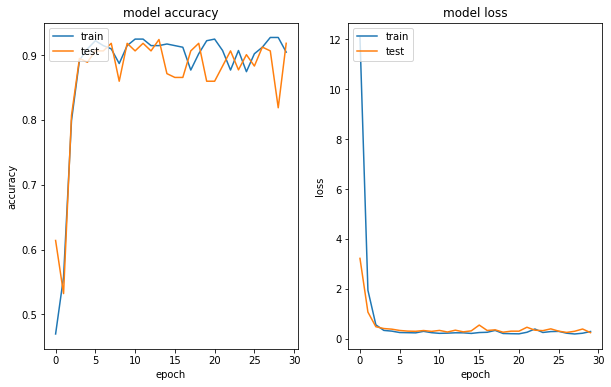

In [ ]:
plot_learning_curve(history)

In [ ]:
model_ls = []
for model in [best_SVM,log_model,ANN_model]:
  if model == ANN_model:
    model_ls.append(model.evaluate(X_test_scaled,y_test)[0])
  else:
    model_ls.append(model.score(X_test_scaled,y_test))
model_score = pd.DataFrame(model_ls,columns=['Accuracy'],index= ['Tuned_SVM','LogisticRegressionCV','Artificial Neural Network'])


# In[59]:


model_score


6/6 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7778


,Accuracy
Tuned_SVM,0.988304
LogisticRegressionCV,0.982456
Artificial Neural Network,0.581449
